# Fractals

<center>
<img src="error_bars.pdf" width="400">
</center>

Reminder: you are going to need to run statistics for your Project!

## Today:
- How to generate fractals
- More on fractal properties

We'll again apply everything we learn here to our two canonical fractals: 
1. the Cantor set
2. the Sierpiński triangle

but keep others such as a Koch curve in mind.

# Creating Fractals

We need formal descriptions of fractals (for analysis and to give the computer)
1. Initiator + generator
2. Iterated function systems
3. Lindenmayer systems

Each of these are very simple mathematical mappings (from simplicity emerges complexity) that describe how the fractal is made from smaller copies.

## Option 1: Initiator + generator
Sometimes referred to as a base and a motif for construction of geometric fractals:
- *initiator* is a starting object for the construction
- *generator* defines exactly how the initiator (and each subsequent object) should be transformed into a more complex and detailed structure. 
    - i.e. it dictates how to recursively replace an object with smaller-scale replicas of it at each iteration via rules, formulas or algorithms
    - equivalently it is the object produced after one iteration

##### Cantor set

The initiator is a horizontal line of length $L$ (often set to 1)

The generator is simply 'remove the middle bit' 

The standard Cantor set has $\lambda=\frac{1}{3}$ such that the middle third is removed and two lines of equal length remain

<center>
<img src="Cantor_InitiatorGenerator.png" width="400">
</center>

##### Sierpiński triangle
To construct it we iteratively remove central triangles. The standard form uses an equilateral triangle of length $L$ as the initiator and the generator is the rule to divide into 4 congruent replicas and remove the central replica (here the upside down triangle).

<center>
<img src="Sierpinski_InitiatorGenerator.png" width="400">
</center>

## Option 2: Iterated Function Systems (IFS)
Fractals can also be created by applying a set of contractive affine transformations (scaling, rotation, translation, and shearing operations) iteratively to a set of points in $\mathbb{R}^n$. Each iteration adds more points and refines the shape

Contractive function: reduces distances between points i.e. it contracts

Formally, let $F\subseteq \mathbb{R}^{n}$ and $f:F\to F$.  $f$ is a contraction mapping on $F$ if there exists a constant $0\leq c < 1$ such that
\begin{equation*}
d( f(x), f(y)) \leq c d(x,y) \text{ for all } x, y \in D.
\end{equation*}
The smallest $c$ for which the inequality holds is called the contraction factor of $f$.

Iterative Application: the IFS repeatedly applies the contractive functions to points, generating a sequence of transformed points. The fractal pattern emerges from the accumulation of these transformed points

There is a unique compact set $\mathcal{A}$ satisfying $f(\mathcal{A})=\mathcal{A}$, i.e. $\mathcal{A}$ is an attractor 

##### Cantor set

Let $X = [0, 1]$ with $d$ the usual Euclidean metric

Consider the following two contraction maps on the metric space $(X, d)$ (recall that a metric space is a set of points, $X$, together with some notion of distance, $d$):
- $l(x)=\frac{1}{3}x \implies l(X)=\Big[0,\frac{1}{3}\Big]$
    - We see $x_{n}=\frac{x_{0}}{3^{n}}$ for $x_{0}\in[0,1]$, and $x_{n}\to 0$ as $n\to\infty$
    - Solving for $l(x)=x$, we see that $x^{*}=0$ is a fixed point
- $r(x)=\frac{1}{3}x+\frac{2}{3} \implies r(X) = \Big[\frac{2}{3},1\Big]$
    - Now, $x_{n}\to 1$ as $n\to\infty$
    - $x^{*}=1$ is a fixed point


Define a set-valued IFS mapping $f$ for any subset $S\subseteq [0,1]$ by
\begin{equation*}
f(S) = l(S) \cup r(S).
\end{equation*}

**Fixed point of $f$ is the Cantor set**

Let $I_{0}=[0,1]$ then,
\begin{equation*}
I_{1} = f(I_{0}) = \Big[0,\frac{1}{3}\Big] \cup \Big[\frac{2}{3}, 1\Big],
\end{equation*}
\begin{align*}
I_{2} = f(I_{1}) &= l\Big(\Big[0,\frac{1}{3}\Big] \cup \Big[\frac{2}{3}, 1\Big]\Big) \cup r\Big(\Big[0,\frac{1}{3}\Big] \cup \Big[\frac{2}{3}, 1\Big]\Big) \\
&= \Big[0, \frac{1}{9}\Big] \cup \Big[\frac{2}{9}, \frac{1}{3}\Big] \cup \Big[\frac{2}{3}, \frac{7}{9}\Big] \cup \Big[\frac{8}{9}, 1\Big].
\end{align*}
In the limit as $n\to\infty$, $I_{n}\to C$, the Cantor set.

$$
C = f(C) = l(C) \cup r(C)
$$

##### Sierpiński triangle

We define our initial triangle with three points $P_1$, $P_2$ and $P_3$ 

The contraction maps are a simple scaling and translation

$$
\color{white}{f_1(x)=\frac{x+P_1}{2}}\\
\color{white}{f_2(x)=\frac{x+P_2}{2}}\\
\color{white}{f_3(x)=\frac{x+P_3}{2}}
$$
<!-- NB: I have no idea why these equations wouldn't render with the proper formatting so have forced it here -->

For any point $x\in \mathbb{R}^2$ each of these functions will map the point $x$ to a point $f_i(x)$ that is halfway to the relevant triangle vertex $P_i$

Again, the IFS is the union of these functions, $f_1(x) \cup f_2(x) \cup f_3(x)$ and the gasket is invariant under the simultaneous application of these three transformations

Note that we could build the gasket from the vertices $I_0=\{P_1, P_2, P_3\}$ (see here: https://www.youtube.com/watch?v=nIIp-vo8rHg) or the entire triangle with all its interior points $ I_0 = \lambda_1 P_1 + \lambda_2 P_2 + \lambda_3 P_3 $.

<!-- where $\lambda_1$, $\lambda_2$, and $\lambda_3$ are the barycentric coordinates (weights) that satisfy the following conditions:
1. Non-Negativity: $\lambda_1 \geq 0 $, $ \lambda_2 \geq 0 $, and $ \lambda_3 \geq 0 $
2. Sum to One: $ \lambda_1 + \lambda_2 + \lambda_3 = 1 $ -->

This is deterministic but we could even apply the transformations probabilistically. These random iteration algorithms are called the 'chaos' game (Barnsley provided the first chaos game algorithm in his book *Fractals Everywhere* [1988]). You will see an example in the Workshop.

**The 'chaos' game**

Start with a seed point $x_{0}\in\mathbb{R}^{n}$ and perform the following random iteration procedure:
\begin{equation*}
x_{t+1} = f_i(x_{t}) , t\geq 0,
\end{equation*}
where at each iteration step, $i$ is chosen at random from the set of function indices $\{1, 2, \ldots, N\}$.

The sequence of points will very quickly get sucked onto the 'strange attractor' (the fractal) and will then stay on it forever.

<!-- We need to generate a large number of points to ensure the $x_{n}$ lie on, or close to, the 'attractor' (fixed point of the IFS). -->

A rule of thumb (if you are designing these) is that the probability $p_{i}$ of choosing map $f_{i}$ should be in some way related to the ratio of the area of the copy $f_{i}(A)$ to the area of $A$. For many 'well-known' IFS attractors choosing the maps with equal probability produces good results.


<!-- This idea of probabilities $p_{i}$ being associated with the IFS maps leads to another important concept, that of invariant measures that “live” on their attractors $A$. (Beyond the scope of this course.) -->

<!-- This is also the basis of the idea of fractal compression (of images). We want the attractor of an IFS to be close to an image. The idea exploits the self-similar structure and a result called the Collage theorem to achieve data compression. 
It's also helping to produce some very realistic graphics for game design/computer animation etc. -->

<!-- https://www.youtube.com/watch?v=kbKtFN71Lfs -->


In [1]:
#Chaos game for Sierpinski triangle (animation)...

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline 

from IPython.display import HTML

import random

# Define the vertices of the Sierpinski triangle
vertices = [(0, 0), (1, 0), (0.5, 0.5*(3**0.5))]

# Set the initial point randomly within the triangle
x, y = random.choice(vertices)

# Number of iterations
iterations = 1000

# Lists to store the generated points
x_values = []
y_values = []

# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Remove the border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove the ticks and tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Define the initialisation function for the animation
def init():
    ax.scatter([], [], s=0.1, c='black')
    padding = 0.1
    ax.set_xlim(-padding, 1+padding)
    ax.set_ylim(-padding, 1+padding)

    # Plot the vertices and add labels
    for i, vertex in enumerate(vertices):
        ax.scatter(vertex[0], vertex[1], c='blue', marker='o', s=50)  # Plot vertices
        ax.text(vertex[0], vertex[1]+0.03, f'P{i+1}', ha='center', va='bottom')  # Label vertices

    return ax

# Define the update function for each frame of the animation
def update(frame):
    global x, y  # Declare x and y as global variables

    # Select a random vertex, i.e. roll the dice
    vertex = random.choice(vertices)

    # Calculate the midpoint between the current point and the selected vertex
    x_new = (x + vertex[0]) / 2
    y_new = (y + vertex[1]) / 2

    # Append the coordinates to the lists
    x_values.append(x_new)
    y_values.append(y_new)

    # Update the scatter plot
    ax.clear()
    ax.scatter(x_values[:-2], y_values[:-2], s=0.1, c='black')  # Plot previous points
    if len(x_values) >= 2:
        ax.scatter(x_values[-2], y_values[-2], s=50, facecolors='none', edgecolors='red')  # Empty circle for previous point
    ax.scatter(x_values[-1], y_values[-1], s=10, c='red')  # Highlight the most recent point
    padding = 0.1
    ax.set_xlim(-padding, 1+padding)
    ax.set_ylim(-padding, 1+padding)
    ax.set_title('Chaos game animation')

    # Plot the vertices and add labels
    for i, vertex in enumerate(vertices):
        ax.scatter(vertex[0], vertex[1], c='blue', marker='o', s=50)  # Plot vertices
        ax.text(vertex[0], vertex[1]+0.03, f'P_{i+1}', ha='center', va='bottom')  # Label vertices

    # Update the current point
    x,y = x_new, y_new

plt.close()

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=iterations, init_func=init, blit=False, interval=10)

# Display the animation
HTML(anim.to_jshtml())

# Save animation
anim.save('animation_Sierpinski_chaos_game.gif', writer='ffmpeg')

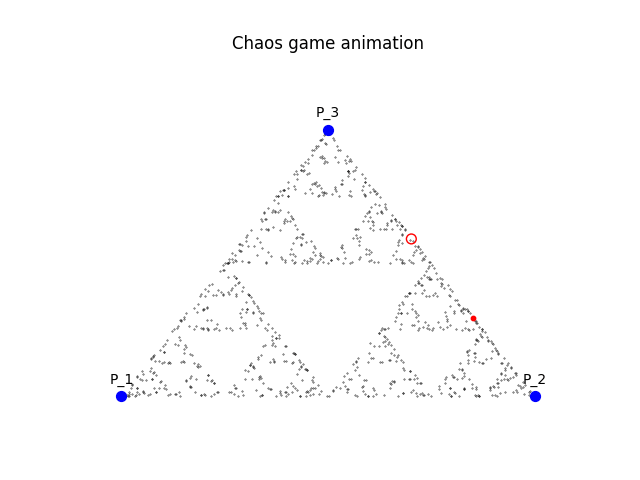

In [2]:
from IPython.display import Image
with open('animation_Sierpinski_chaos_game.gif','rb') as file:
    display(Image(file.read()))

## Option 3: Lindenmayer systems
aka L-systems

Formal string rewriting systems introduced in 1968 by the botanist Aristid Lindenmayer to model the growth of plants (but also developed thousands of years ago in India as a method of decoration.) 


Uses an algorithm that is often referred to as 'turtle graphics' (and python has a ```turtle``` package you might like to look at for generating fractals.), which operates by recursively replacing parts according to instructions provided by a set of rewriting rules
<!-- Note that turtle doesn't play very nice with Jupyter Notebooks so you'll need to do this in your own IDE if you want to play with it -->

The recursive nature of the L-system rules is what leads to self-similarity and clearly this is a variation of the initiator+generator approach.

Any fractal that consists of smaller copies of itself, with the pieces all connected such that we could draw it without taking our pen off the page, could probably be generated by a suitable L-system.

It is a grammar defined by the tuple: $G = (V, \alpha, R)$
- $V$ is the alphabet is made up of Variables (the elements that can be replaced) and Constants/Parameters (the elements that can't be replaced)
    - e.g. $V = \{\text{F},\text{f},+,-\}$
    
        **Variables:** 
        
        $\text{F}$ Move forward one step while drawing a line 
        
        $\text{f}$	Move forward one step without drawing a line
        
        **Constants:**
        
        $+$	Turn counterclockwise by a specified angle $q$
        
        $-$	Turn clockwise by a specified angle $q$
        
- $\alpha$ is starting state/axiom
- $R$ are the Rules that define how the variables are replaced with combinations of constants and other variables


##### Cantor set
- alphabet: $\{\text{F}, \text{f}\}$
- start: F
- rules: ($\text{F} \rightarrow \text{FfF}$), ($\text{f} \rightarrow \text{fff}$), where $\text{F}$ means "draw forward" and $\text{f}$ means "move forward" (and don't draw).

One step produces the string $\text{FfF}$

Two steps: $\text{FfFfffFfF}$

...

<!-- ##### Sierpiński -->
<!-- - alphabet: $\{\text{F}, \text{G}, +, −\}$
- start: F−F−F (a triangle)
- rules: ($\text{F} \rightarrow F−G+F+G−F$), (G $\rightarrow$ GG), where F means "draw forward", G means "draw forward", $+$ means "turn left by angle", and $−$ means "turn right by angle".

angle: 120° -->

##### Sierpiński (arrowhead) curve
Arrowhead construction: Same limit as the triangle but built with a one-dimensional curve.

- alphabet: {F,G,+,-}
<!-- Formatting not working? -->
<!-- $\{\text{F}, \text{G}, +, − \}$ -->

- start: $\text{F}$

- rules: F $\rightarrow$ G-F-G, G $\rightarrow$ F+G+F
<!-- ($\text{F} \rightarrow \text{G} - \text{F} - \text{G}$), ($\text{G} \rightarrow \text{F} + \text{G} + \text{F}$) -->

where, $\text{F}$ and $\text{G}$ both mean "draw forward", $+$ means "turn left by angle", $−$ means "turn right by angle" and angle=60°

<center>
<img src="Sierpinski_arrowhead_curve.png" width="300">
</center>

A really nice complexity explorable here: https://www.complexity-explorables.org/explorables/hokus-fractus/ 

# Fractal properties
We've seen that fractals are defined by their properties:
- self-similarity
<!-- scale free because there is a a statistical regularity that holds at all scales -->
- infinite complexity
- fractal dimension

## Self-similarity
Self-similarity means that the fractal contains smaller copies or subsets of itself. 

The overall pattern is repeated at different (all) scales.
 
Recursion, contraction mapping and L-system replacement *all* sensibly produce self-similarity

## Infinite complexity


##### Cantor set

Following each iteration of generating the Cantor set, what is the number of segments and total length of the resulting object? 

- first iteration: there are two line segments of length $\frac{L}{3}$ each. Therefore, the length of the Cantor Set after the first iteration is $\frac{2L}{3}$.
- second iteration: the middle third of each of the remaining line segments is removed. This leaves four line segments of length $\frac{L}{3}\frac{1}{3}=\frac{L}{9}$ each. Therefore, the total length of the Cantor Set after the second iteration is $\frac{4L}{9}$. 
- ...

Generalising this result to $n$ iterations to understand the final fractal:
- after the $n$th iteration: we observe that at each iteration, the remaining line segments are divided into $3^n$ equal parts, and the middle third is removed. Therefore, the length of each line segment at the $n$th iteration is $L\big(\frac{1}{3}\big)^n$. Since we have $2^n$ line segments at each iteration, the total length of the Cantor Set after the $n$th iteration is $2^n L\big(\frac{1}{3}\big)^n = L\big(\frac{2}{3}\big)^n$ 
- as $n\rightarrow \infty$ the number of segments $2^n\rightarrow \infty$ and the length of each line segment $L\big(\frac{2}{3}\big)^n\rightarrow 0$.

i.e. The final topological space is nowhere dense and not a countable set (i.e. we don't have a one-to-one correspondence with the natural numbers).

##### Sierpiński triangle
    
Following each iteration of generating the Sierpiński triangle (equilateral with length $L=1$), what is the 'perimeter', $P$, and area, $A$, of the resulting object? Again, we will generalise the result to $n$ iterations to understand the final fractal.

Perimeter:
- Step 0: 3 sides of length 1, $P=3$
- Step 1: We now have 3 times as many sides that are half as big, $P=3\times \frac{3}{2}=\frac{9}{2}$
- Step 2: We again have 3 times as many sides as before and each side is half as long, $P=3\times \frac{9}{2}\frac{1}{2}=\frac{27}{4}$
- ...
- Step $n$: $P=3\times \Big(\frac{3}{2}\Big)^n$ 
- $\lim_{n\rightarrow\infty}3\times \Big(\frac{3}{2}\Big)^n=\infty$

Area:
- Step 0: Let area =$A$
- Step 1: 1/4 of the area has been removed so $A=\frac{3}{4}A$
- Step 2: We again remove 1/4 of the existing area, $A=\frac{3}{4}\frac{3}{4}A$
- ...
- Step $n$: $A=\Big(\frac{3}{4}\Big)^nA$ 
- $\lim_{n\rightarrow\infty} \Big(\frac{3}{4}\Big)^nA=0$

This is an object with infinite perimeter and no area!

An infinitely long curve doesn't tell us much though. A more useful measure is the *fractal dimension*.

## Fractal dimension

We've already seen the 'self-similarity dimension' (also sometimes referred to as capacity dimension):
$$D=-\frac{\log N}{\log r}$$ 

When it comes to computing the dimension of more complex objects, like for example the British coast line, we do not have exact replicas when we scale. Things like this are statistical fractals and we can only hope to estimate their fractal dimension.  

<!-- Note that there are many methods (for compact sets with exact affine self-similarity they all agree but in general they are not equivalent). All involve looking at how an object behaves when the scale of analysis is changed. -->

### Hausdorff (Hausdorff-Besicovitch) dimension 
When we don't have exact replicas, the self-similarity dimension can be generalised as the Hausdorff dimension:
$$
\text{dim}_{\text{H}}(X):= \lim_{\varepsilon\rightarrow 0}\frac{\log N(\varepsilon)}{\log\big(\frac{1}{\varepsilon}\big)}
$$

where $\varepsilon > 0$, $N(\varepsilon)$ is  the smallest number of balls with length scale $\varepsilon$ needed to cover the set $X$

For smooth (Euclidean) shapes the Hausdorff dimension is an integer equal to the topological dimension but in general it is greater than the topological dimension. 

##### Hausdorff dimension of our standard (non-fractal) objects

Consider a straight line...

Hausdorff dimension is the limit of the sequence:
\begin{equation*}
\frac{\log 1}{\log 1}, \frac{\log 2}{\log 2}, \ldots
\end{equation*}

i.e. a single line segment of length 1 can be completely covered with $N=1$ ball, halving the size of the ball doubles the amount of balls required etc.

This agrees with the topological dimension of the space.

##### Cantor set

Now consider the general Cantor set, where we remove the middle of the line of length 1, leaving 2 lines of length $\lambda$...

We only need $N=1$ ball for a size $\varepsilon=1$, $N=2$ balls of size $\varepsilon=\lambda$ etc.  

\begin{equation*}
\color{white}{
\text{dim}_{H} = \lim_{k\rightarrow\infty}\frac{\log 2^{k}}{\log\lambda^{k}}=\lim_{k\rightarrow\infty}\frac{k\log 2}{k(-\log\lambda)}=\frac{\log 2}{-\log\lambda}}
\end{equation*}
<!-- NB: I've had to force the formatting here too -->

(Note that instead of thinking about the size of the covering balls going to zero we are thinking about the number of iterations, i.e. applications of the generator, going to infinity)

For the familiar middle third Cantor set, $\lambda=\frac{1}{3}$, and so
\begin{equation*}
\text{dim}_{H} = \frac{\log 2}{-\log\frac{1}{3}} = \frac{\log 2}{\log 3} = 0.6309.
\end{equation*}

- as $\lambda\rightarrow\frac{1}{2}$, $d\rightarrow 1$ since we don't remove anything and so we have a line in the limit.
- as $\lambda\rightarrow 0$, $\text{dim}_{H}\rightarrow 0$ since we remove everything and so in the limit have a finite number of points.

The topological dimension of the space (a set of points) is 0 and the fractal dimension strictly exceeds its topological dimension as the fractal occupies more space than traditional Euclidean geometric shapes.

### Box counting (Minkowski–Bouligand) dimension
For fractals that don't have nice analytic solutions the Hausdorff dimension can be estimated as the exponent of a power law using the box counting method 
<!-- The number of boxes covering a fractal has this characteristic power law dependence, as shown in Fig. 8, and the fractal dimension is obtained as the slope. -->

This is one of the simplest methods for estimating the fractal dimension of an object

As with the Hausdorff dimension, it is motivated by how an object relates the amount of stuff to the characteristic length scale, $\varepsilon$ and analyses how the number of boxes (instead of balls) required to cover the object changes with the size of the boxes:

- a curve of length $L$: $N(\varepsilon) \propto \frac{L}{\varepsilon}$
- an region of area $A$: $N(\varepsilon) \propto \frac{A}{\varepsilon^2}$ 
- in general: $ N(\varepsilon)\approx\frac{C}{\varepsilon^{d}}$, for some $C$ constant. 
<center>
<img src="BoxCounting_Wiki.png" width="350">
</center>

(Image source: https://en.wikipedia.org/wiki/Minkowski–Bouligand_dimension)

<!-- It's the same idea as changing the scale of the ruler that we saw previously. Similar

Note that the 'ruler' should have the dimension of the space the object of interest is embedded in. -->

We use this relationship, which holds for non-integer dimension too, to compute the box-counting dimension:
\begin{equation*}
N(\varepsilon)\approx\frac{C}{\varepsilon^{d}}
\end{equation*}
for some $C$ constant.  

Taking logarithms,
\begin{equation*}
\log N(\varepsilon) \approx \log C - d\log \varepsilon
\implies 
d  \approx \frac{\log N(\varepsilon)-\log C}{-\log \varepsilon}
\end{equation*}

Hence we can estimate $d$ by plotting $N(\varepsilon)$ against $\varepsilon$ (or $1/\varepsilon$) and determining the slope. We'll need to specify the resolution of the boxes. Higher resolution will give us a more accurate results for the dimension.

If infinite resolution exists then:
$$
d = \lim_{\varepsilon\rightarrow 0}\frac{\log N(\varepsilon)}{\log\frac{1}{\varepsilon}}
$$

but otherwise we are looking for a *scaling region* (somewhere in between epsilon so small that it captures only a single data point and epsilon so large it covers the entire object)

### There are other types of dimensions too...
##### e.g. Correlation dimension
Measures how tightly clustered points in a set are

We use it frequently in the analysis of attractors and time delay embeddings

More generally, consider a cloud of points $V=\{ x_t\}_{t=1}^{N}$ representing, for example, a chaotic attractor, or a fixed point of an IFS.

Consider putting a ball around a point in this cloud, then $N_x(\varepsilon)$ denotes the number of points inside the neighbourhood of the point $x$. 

As $\varepsilon$ increases the number of points in $N_x(\varepsilon)$ grows. The point-wise dimension:
$$N_x(\varepsilon) \propto \varepsilon^d$$

For the entire point cloud we average over all points and this gives the correlation dimension:
$$C(\varepsilon )\sim \varepsilon ^{d }$$

Note that the box-counting dimension weights all the occupied boxes equally but the correlation dimension accounts for density of points.

At best, the correlation dimension could capture all the points and hence, $d_{correlation}\leq d_{capacity}$

In practice we calculate the correlation dimension via the correlation sum as follows:

$$
\color{white}{C(\varepsilon, N) = \frac{2}{N(N-1)}\sum_{i=1}^{N}\sum_{j=i+1}^{N}\Theta(\varepsilon-\|x_{i}-x_{j}\|)}
$$
where $\Theta(x)$ is the Heaviside step function and $C(\varepsilon, N)$ is the number of pairs of points within a distance $\varepsilon$ of each other.

This reflects the mean probability that two arbitrarily chosen points are close

We *assume* the correlation sum scales like a power law, $C(\varepsilon)\approx\varepsilon^{D_{2}}$ for small $\varepsilon$ and the *correlation dimension* is then defined to be:
\begin{equation*}
D_{2} = \lim_{\varepsilon\rightarrow 0}\lim_{N\rightarrow\infty}\frac{\log C(\varepsilon, N)}{\log\varepsilon}.
\end{equation*}


<!-- Note, also the inner limit is just wishful thinking to invoke the implied *correlation integral* which the correlation sum approximates
\begin{equation*} 
C\rightarrow{\cal C}(\epsilon,N):=\int\int \Theta(\|x-y\|<\varepsilon)d\mu(x)d\mu(y).
\end{equation*}
 -->
Advantage: straightforward, relative quick to compute and can handle relatively few data

$D_{2}$ gotcha's:
- When using correlation dimension don't just report a number show the correlation sum log-log plot and indicate the scaling region.
- In the 80's, 90's many researchers reported fractal correlation dimension for all sorts of data without showing the scaling regions and claimed their system was chaotic.
- A lot of this work is largely discredited.  
<!-- (Similar to people claiming their complex networks are scale-free because they can draw a straight line through their empirical degree distribution on a log-log plot.) -->

**Grassberger-Procaccia method (not quite discredited)**

The Grassberger-Procaccia method is used to directly calculate the correlation sum and plot $\log C(\varepsilon, N)$ against $\log\varepsilon$.

One then finds/chooses a scaling region -- where it looks linear -- and approximates the slope to get $D_{2}$.

Issues:
- The error estimate of the statistical fit are not confidence intervals for the correlation dimension estimate.
- Any noise will fill the available space and so in the case of noise, or high noise contaminated signals, expect estimates of $D_{2}$ to be the dimension the points live in.
- Good practice: look at (and show) the Correlation Sum plots and then decide, given the data, if extracting a number for $D_{2}$ is useful, i.e., show the scaling plots and the region used to estimate $D_{2}$.
- One of the problems with the Grassberger-Proccacia algorithm is that it assumes that a scaling region exists and then makes a best guess at what it should be.  
- Scaling in the correlation integral is bounded at large scales by the size of the attractor (the curve flattens).
- At small length scales, even without noise (which is another problem), quantization introduces noise.
- There are less points for small length scales, and many points at large scales, this introduces a statistical correlation as the sample size from which the correlation integral is estimated varies with scale.

# Thinking about your project...

Does your complex system grow with recursion? It could be created or approximated with one of the methods for generating a fractal.

Does your complex system produce an object with fractal-like properties? I'd expect you to demonstrate and quantify it.

# Connections to other units

**3A7**
Chaotic dynamics also often gives rise to fractals, and hence, estimating the dimension of these fractals is of interest (moreover it is an invariant quantity of the underlying attractor).

There are many different dimensions distiguished by the metric used to calculate them.

Box-counting dimension redux: Consider the states of a dynamical system (e.g., obtained by numerically integrating the ode's) as a fractal object in phase space.

Calculate how many $\varepsilon$-balls are required to encompass all of the states and then plot $\log N(\varepsilon)$ verses $-\log\varepsilon$ for different $\varepsilon$, and approximate 'd' the slope of the line (naively assuming there is a linear scaling region) to get an estimate of the dimension.

# For inclusion in 2024
## Correlation dimension
A type of fractal dimension

Aligns with intuition for a measure of dimension, e.g.
- points sampled from a line have $v=1$
- points sampled from a triangle have $v=2$

straightforward and quick to calculate
less noisy when only a small number of points are available

 the correlation integral $C(\varepsilon)$ is calculated by:
$$C(\varepsilon )=\lim _{N\rightarrow \infty }{\frac {g}{N^{2}}}$$
where $g$ is the total number of pairs of points which have a distance between them that is less than distance $\varepsilon$ (a graphical representation of such close pairs is the recurrence plot). As the number of points tends to infinity, and the distance between them tends to zero, the correlation integral, for small values of $\varepsilon$, will take the form:

$$ C(\varepsilon )\sim \varepsilon ^{\nu }$$

Grassberger and Procaccia introduced the technique in 1983:  Peter Grassberger and Itamar Procaccia (1983). "Measuring the Strangeness of Strange Attractors". Physica D: Nonlinear Phenomena. doi:10.1016/0167-2789(83)90298-1.

(potentially set up for connection to PH in 4th year)
Connection to Huffman encoding: https://www.youtube.com/watch?v=OjTwzFzxR8M

From Simplifying Complexity Podcast...
Scaling: how complex systems respond to changes in their size
We're made of the same stuff as mice but they live 2-3 years. Same number of heartbeats in a lifetime as humans, and whales and... all other mammals.

We expect all of this diversity because of evolution but what we have is something fundamental that gives us laws based on weight of animal
Trying to understand the underlying principles of a system.

Plotting - not just impractical, it's stupid. We need the logarithmic scale/logarithmic coordinates so that we can plot orders of magnitude

Allometry: https://www.nature.com/scitable/knowledge/library/allometry-the-study-of-biological-scaling-13228439/

https://x.com/bhcomplexity/status/1621379813427793920?s=49&t=pWPlPkE-SmCUmYrqJkZ3Ng

Cities scale super-linearly and essentially can't be killed (think New Orleans). Biology and companies scale sub-linearly and will inevitably die.